<a href="https://colab.research.google.com/github/sujiraa/BasicProg_DataViz65/blob/main/DataViz02_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA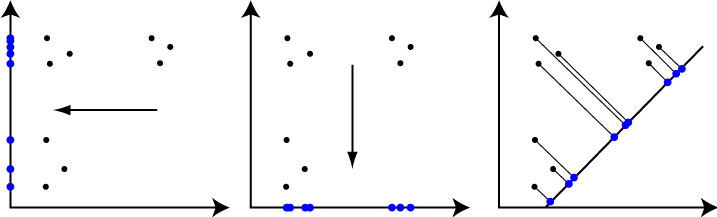
เมื่อมี ตัวแปร ที่จะนำมาแสดงการกระจายของข้อมูลมากกว่า 2 ตัวแปร สามารถใช้ PCA (Principle Component Analysis) เพื่อลดจำนวนตัวแปรลงมาได้โดยรักษาลักษณะการกระจายของข้อมูลได้มากที่สุด

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,10] #ขนาด

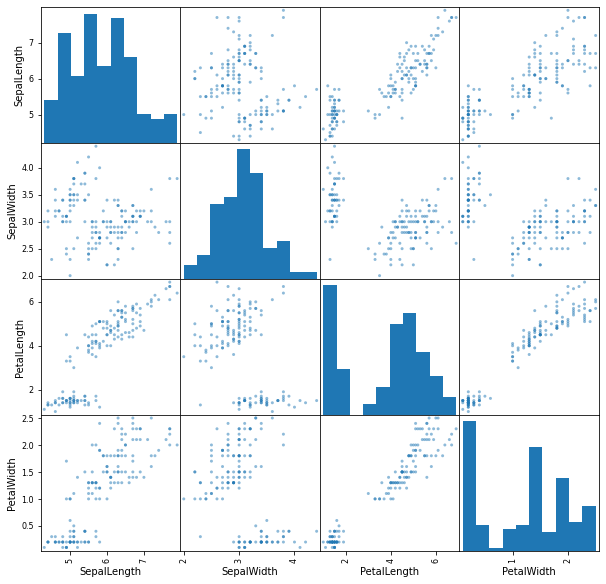

In [4]:
pd.plotting.scatter_matrix(example_df); #ดูการกระจายเเบบคร่าวๆ

เริ่มทำ PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA()

In [7]:
thisdata = example_df.iloc[:,:-1]
thisdata

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
new_axis = pca.fit_transform(thisdata)

In [9]:
new_axis.shape

(150, 4)

In [10]:
new_axis

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00,  3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02],
       [-2.27989736e+00,  7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.82089068e+00, -8.21045110e-02,  2.64251085e-01,
        -5.00996251e-02],
       [-2.62648199e+00,  1.70405349e-01, -1.58015103e-02,
        -4.62817610e-02],
       [-2.88795857e+00, -5.70798026e-01,  2.73354061e-02,
        -2.66154143e-02],
       [-2.67384469e+00, -1.06691704e-01, -1.91533300e-01,
        -5.58909660e-02],
       [-2.50652679e+00,  6.51935014e-01, -6.92749958e-02,
        -1.66082478e-02],
       [-2.61314272e+00,  2.15206320e-02,  1.07650353e-01,
      

In [11]:
PCAdf = pd.DataFrame.from_records(new_axis, columns = ['PCA1','PCA2','PCA3','PCA4'])
PCAdf

,PCA1,PCA2,PCA3,PCA4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129
...,...,...,...,...
145,1.944017,0.187415,0.179303,0.425082
146,1.525664,-0.375021,-0.120636,0.255723
147,1.764046,0.078519,0.130784,0.136295
148,1.901629,0.115877,0.722874,0.040873


In [12]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

#plot PCA data

In [13]:
from matplotlib import pyplot as plt

In [14]:
example_df2 = example_df.replace({'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'})

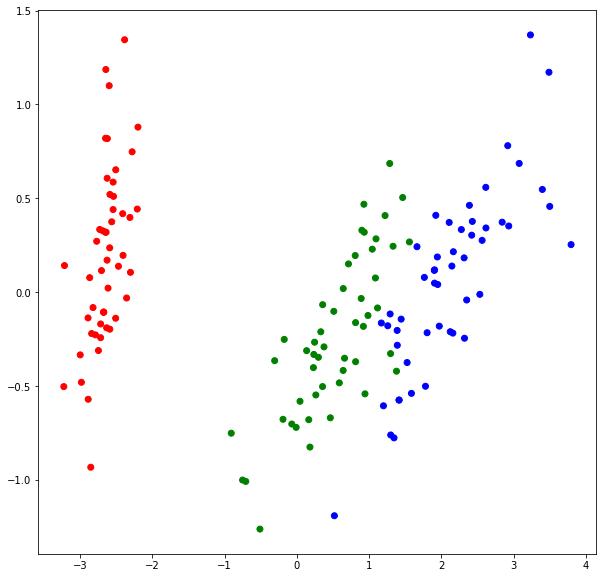

In [15]:
plt.scatter(PCAdf['PCA1'],PCAdf['PCA2'],c=example_df2['Name'])

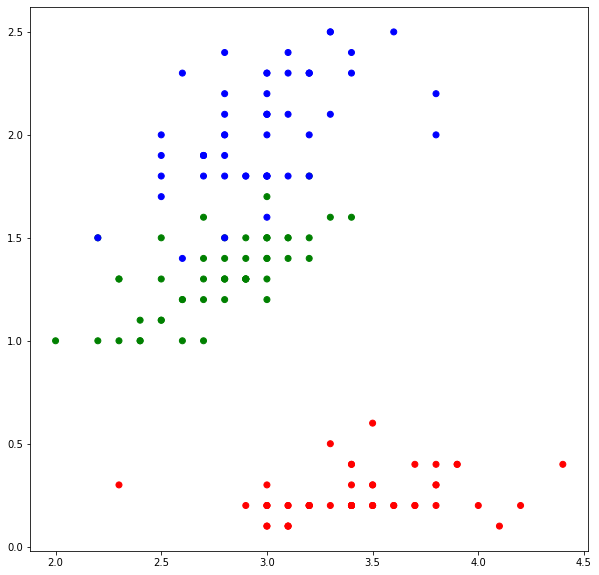

In [16]:
plt.scatter(example_df2['SepalWidth'],example_df2['PetalWidth'],c=example_df2['Name'])

##เปรียบเทียบ ข้อมูล ด้วย coordinate plot

In [17]:
sample_data = example_df.groupby('Name').mean()

In [18]:
sample_data

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [19]:
sample_data.iloc[0,:]

SepalLength    5.006
SepalWidth     3.418
PetalLength    1.464
PetalWidth     0.244
Name: Iris-setosa, dtype: float64

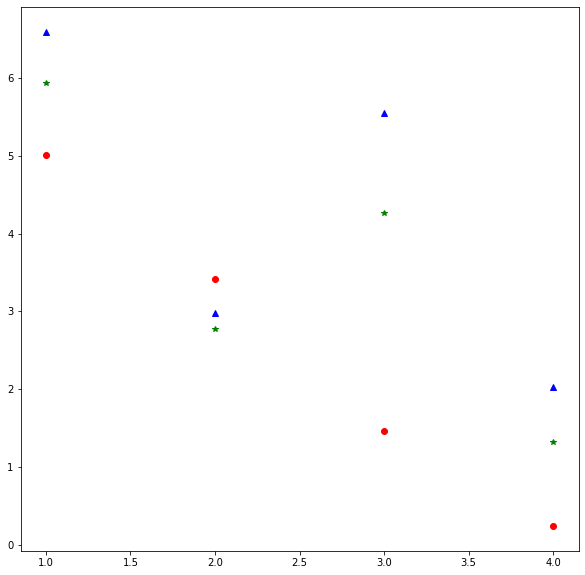

In [20]:
plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^')

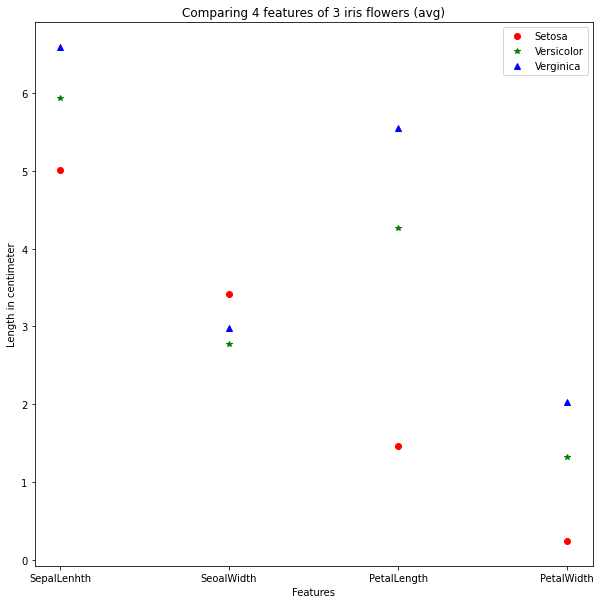

In [21]:
plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro' ,label= 'Setosa')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*' ,label= 'Versicolor')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^' ,label= 'Verginica')
plt.title('Comparing 4 features of 3 iris flowers (avg)');
plt.xlabel('Features')
plt.ylabel('Length in centimeter')
plt.xticks([1,2,3,4],['SepalLenhth','SeoalWidth','PetalLength','PetalWidth']);
plt.legend()

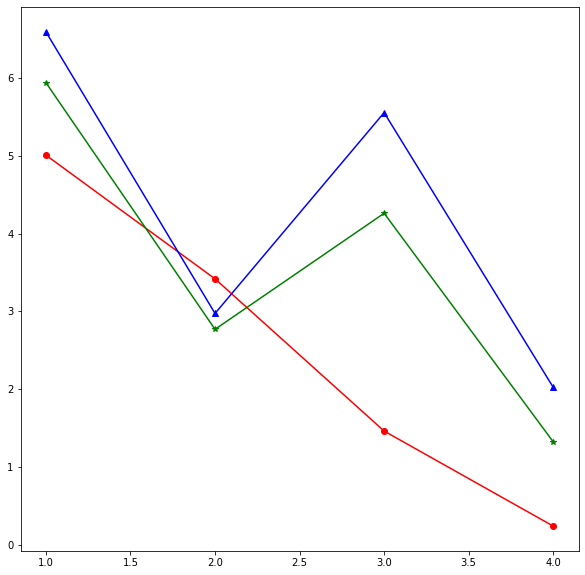

In [22]:
plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro-')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*-')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^-') #ไม่ควรทำเพราะ ถ้าเชื่อม ควรมีความเชื่อมโยงกัน

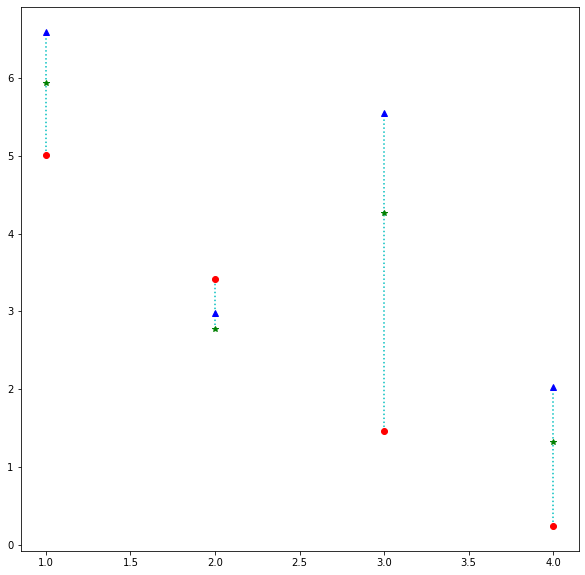

In [23]:
plt.plot([1,1],[min(sample_data.iloc[:,0]),max(sample_data.iloc[:,0])],'c:')
plt.plot([2,2],[min(sample_data.iloc[:,1]),max(sample_data.iloc[:,1])],'c:')
plt.plot([3,3],[min(sample_data.iloc[:,2]),max(sample_data.iloc[:,2])],'c:')
plt.plot([4,4],[min(sample_data.iloc[:,3]),max(sample_data.iloc[:,3])],'c:')

plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^')

#HW วาดรูป ก้อนเมฆ และ ฝน ด้วย plt.plot

Bar chart

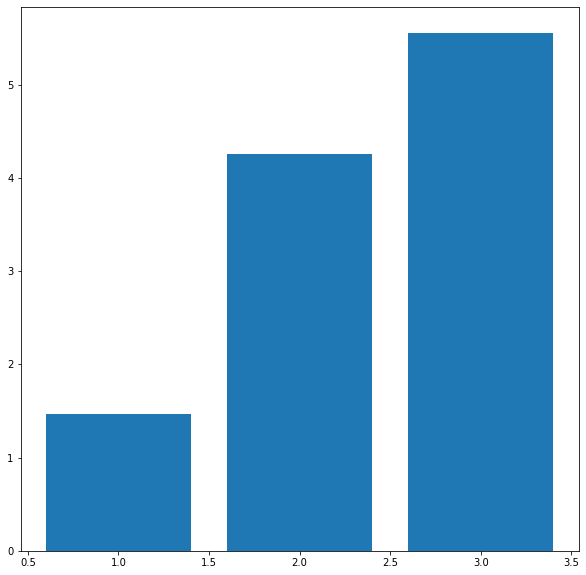

In [24]:
plt.bar([1,2,3],sample_data['PetalLength']);#เปรียบเทียบปริมาณ 1 ปริมาณของ object หลาย class

In [25]:
sample_data.reset_index()

,Name,SepalLength,SepalWidth,PetalLength,PetalWidth
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


In [26]:
sample_data.reset_index()['Name']

0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
Name: Name, dtype: object

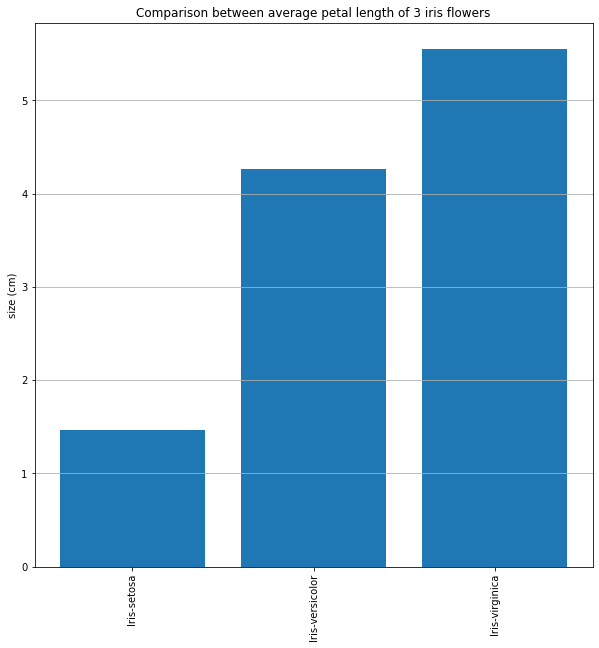

In [27]:
plt.bar([1,2,3],sample_data['PetalLength'])
plt.xticks([1,2,3], sample_data.reset_index()['Name'], rotation='vertical')
plt.title('Comparison between average petal length of 3 iris flowers')
plt.grid(True,axis='y')
plt.ylabel('size (cm)');

#เปรียบเทียบปริมาณ มากกว่า 1 ปริมาณของ object หลาย class

In [28]:
import numpy as np

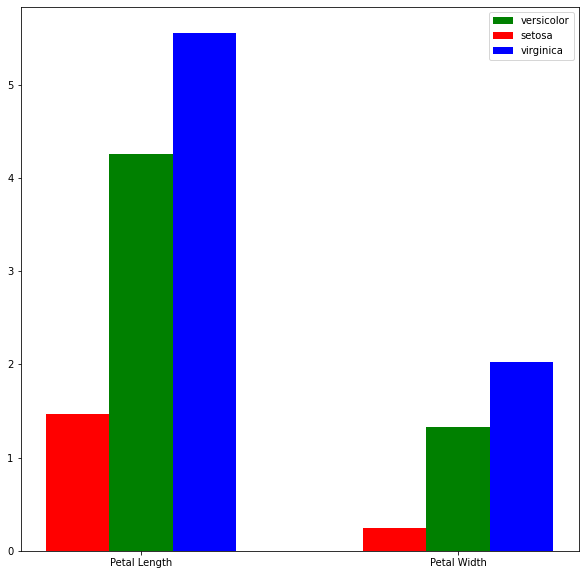

In [29]:
width = 0.2 #กำหนดความกว้างเเท่ง

plt.bar([1, 2],[sample_data['PetalLength'][1],sample_data['PetalWidth'][1]],width,color='g',label='versicolor') #ดอกที่ 2 versicolor
plt.bar([1-width, 2-width],[sample_data['PetalLength'][0],sample_data['PetalWidth'][0]],width,color='r',label='setosa') #ดอกที่ 1 setosa ขยับซ้าย
plt.bar([1+width, 2+width],[sample_data['PetalLength'][2],sample_data['PetalWidth'][2]],width,color='b',label='virginica') #ดอกที่ 1 setosa ขยับซ้าย

plt.xticks([1,2], ['Petal Length','Petal Width'])
plt.legend();

# Quiz 7
plot barchart เปรียบเทียบ  feature ทั้ง 4 ของดอกไม้เเต่ละชนิด

In [33]:
import pandas as pd

In [34]:
import numpy as np

In [35]:
from matplotlib import pyplot as plt

In [36]:
sample_data = example_df.groupby('Name').mean()

In [37]:
sample_data2=sample_data.transpose()

In [38]:
sample_data2

Name,Iris-setosa,Iris-versicolor,Iris-virginica
SepalLength,5.006,5.936,6.588
SepalWidth,3.418,2.770,2.974
PetalLength,1.464,4.260,5.552
PetalWidth,0.244,1.326,2.026


Text(0.5, 1.0, 'Compare the differences between the three types of flowers.')

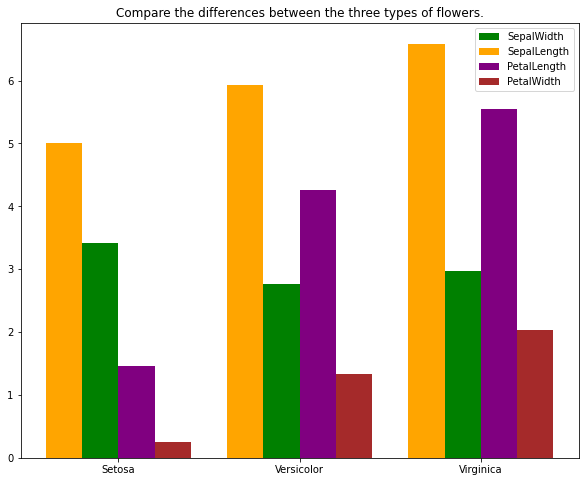

In [47]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,8]

width = 0.2 #กำหนดความกว้างของแท่ง 

plt.bar([0.9, 1.9, 2.9],[sample_data2['Iris-setosa'][1],sample_data2['Iris-versicolor'][1],sample_data2['Iris-virginica'][1]],width,color='green',label='SepalWidth') 
plt.bar([0.9-width, 1.9-width, 2.9-width],[sample_data2['Iris-setosa'][0],sample_data2['Iris-versicolor'][0],sample_data2['Iris-virginica'][0]],width,color='orange',label='SepalLength')
plt.bar([1.1, 2.1, 3.1],[sample_data2['Iris-setosa'][2],sample_data2['Iris-versicolor'][2],sample_data2['Iris-virginica'][2]],width,color='purple',label='PetalLength')
plt.bar([1.1+width, 2.1+width, 3.1+width],[sample_data2['Iris-setosa'][3],sample_data2['Iris-versicolor'][3],sample_data2['Iris-virginica'][3]],width,color='brown',label='PetalWidth')

plt.xticks([1,2,3], ['Setosa','Versicolor','Virginica'])
plt.legend();
plt.title('Compare the differences between the three types of flowers.')
